In [3]:
import (
	"fmt"
	"os"
	"time"

	"github.com/mrazza/gonav"
	"encoding/csv"
	"io"
	"strconv"
	"strings"
	"image"
	"image/draw"
	"image/jpeg"
	r2 "github.com/golang/geo/r2"
	metadata "github.com/markus-wa/demoinfocs-golang/v2/pkg/demoinfocs/metadata"
    ex "github.com/markus-wa/demoinfocs-golang/v2/examples"
	demoinfocs "github.com/markus-wa/demoinfocs-golang/v2/pkg/demoinfocs"
	events "github.com/markus-wa/demoinfocs-golang/v2/pkg/demoinfocs/events"
    heatmap "github.com/dustin/go-heatmap"
    schemes "github.com/dustin/go-heatmap/schemes"
	"bytes"
    "reflect"



)

In [4]:
func checkError(err error) {
	if err != nil {
		panic(err)
	}
}

In [5]:
print(ok == nil && ok1 == nil && ok2 == nil && ok3 == nil && ok4 == nil && ok5 == nil && ok6 == nil)
// killer.team = 2 == T side, killer.team == 3 means CT side

ERROR: repl.go:1:7: undefined identifier: ok

In [44]:
func createImage(points[] r2.Point, mapname string) *image.RGBA {
    if len(points) == 0 {
        return nil
    }
    r2Bounds := r2.RectFromPoints(points...)
    bounds := image.Rectangle{
         Min: image.Point{X: int(r2Bounds.X.Lo), Y: int(r2Bounds.Y.Lo)},
        Max: image.Point{X: int(r2Bounds.X.Hi), Y: int(r2Bounds.Y.Hi)},
    }
    
    var data []heatmap.DataPoint
    for _, p := range points[1:] {
        // Invert Y since go-heatmap expects data to be ordered from bottom to top
        data = append(data, heatmap.P(p.X, p.Y*-1))
    }
    fMap, err := os.Open(fmt.Sprintf("./csgo/data/map/%s.jpg", mapname))
    checkError(err)
    
    imgMap, _, err := image.Decode(fMap)
    checkError(err)
    
    img := image.NewRGBA(imgMap.Bounds())
    draw.Draw(img, imgMap.Bounds(), imgMap, image.ZP, draw.Over)
    
    imgHeatmap := heatmap.Heatmap(image.Rect(0, 0, bounds.Dx(), bounds.Dy()), data, 30, 128, schemes.AlphaFire)
    draw.Draw(img, bounds, imgHeatmap, image.ZP, draw.Over)
    
    return img

}

In [ ]:
303

In [83]:
func convertPathsToArraysOfPoints(arr[] string) ([]r2.Point, []r2.Point, []r2.Point, []r2.Point, []r2.Point, []r2.Point, []r2.Point, ) {
    var miragePoints []r2.Point
    var dustPoints []r2.Point
    var infernoPoints []r2.Point
    var nukePoints []r2.Point
    var overpassPoints []r2.Point
    var trainPoints []r2.Point
    var vertigoPoints []r2.Point
    for i, x := range arr {
        file, err := os.Open(x)
        checkError(err)
        
        p := demoinfocs.NewParser(file)
        
        header, err := p.ParseHeader()
        checkError(err)
        
        mapMetadata := metadata.MapNameToMap[header.MapName]
        
        if(header.MapName == "de_dust2"){
            var points []r2.Point   
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
                if((e.Killer.String() == "-Ax1Le-" || e.Killer.String() == "Ax1Le" || e.Killer.String() == "Ax1Le.VulkanBet" ) && e.Killer.Team == 3 ) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                dustPoints = append(dustPoints, r2.Point{X: x, Y: y})
            }
            })           
        } else if (header.MapName == "de_mirage") { 
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if((e.Killer.String() == "nafany" || e.Killer.String() == "nafany.VulkanBet"  ) && e.Killer.Team == 2) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                miragePoints = append(miragePoints, r2.Point{X: x, Y: y})
            }
            })                
        } else if (header.MapName == "de_inferno") {  
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == "EliGE" && e.Killer.Team == 2) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                infernoPoints = append(infernoPoints, r2.Point{X: x, Y: y})
            }
            })                
        } else if (header.MapName == "de_vertigo") {
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == "EliGE" && e.Killer.Team == 2) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                vertigoPoints = append(vertigoPoints, r2.Point{X: x, Y: y})
            }
            })                
        }  else if (header.MapName == "de_train") {
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == "EliGE" && e.Killer.Team == 2) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                trainPoints = append(trainPoints, r2.Point{X: x, Y: y})
            }
            })                
        } else if (header.MapName == "de_overpass") {
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == "EliGE" && e.Killer.Team == 2) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                overpassPoints = append(overpassPoints, r2.Point{X: x, Y: y})
            }
            })                
        } else if (header.MapName == "de_nuke") {
            p.RegisterEventHandler(func(e events.Kill) {
            // Translate positions from in-game coordinates to radar overview image pixels
            if(e.Killer.String() == "EliGE" && e.Killer.Team == 2) {
                x, y := mapMetadata.TranslateScale(e.Killer.Position().X, e.Killer.Position().Y)
                nukePoints = append(nukePoints, r2.Point{X: x, Y: y})
            }
            })                
        }
        
        err = p.ParseToEnd()
        checkError(err)    
    }
    return miragePoints, dustPoints, infernoPoints, vertigoPoints, trainPoints, overpassPoints, nukePoints
}

In [84]:
gambit_demo_paths := []string{"./demos/gambitMirage/gambit/furia-vs-gambit-m3-mirage_2346946.dem", "./demos/gambitMirage/gambit/gambit-vs-complexity-m2-mirage_2345614.dem", "./demos/gambitMirage/gambit/gambit-vs-forze-m1-mirage_2345856.dem", "./demos/gambitMirage/gambit/gambit-vs-furia-m1-mirage_2347751.dem", "./demos/gambitMirage/gambit/gambit-vs-havu-m2-mirage_2346895.dem", "./demos/gambitMirage/gambit/gambit-vs-heroic-m3-mirage_2346579.dem", "./demos/gambitMirage/gambit/gambit-vs-heroic-m5-mirage_2347028.dem", "./demos/gambitMirage/gambit/gambit-vs-spirit-m2-mirage_2346894.dem", "./demos/gambitMirage/gambit/gambit-vs-virtus-pro-m3-mirage_2345809.dem", "./demos/gambitMirage/gambit/gambit-vs-virtus-pro-m3-mirage_2346388.dem",  "./demos/gambitMirage/gambit/k23-vs-gambit-m1-mirage_2345855.dem",  "./demos/gambitMirage/gambit/natus-vincere-vs-gambit-m2-mirage_2346940.dem",  "./demos/gambitMirage/gambit/nemiga-vs-gambit-m1-mirage_2345805.dem",  "./demos/gambitMirage/gambit/teamone-vs-gambit-m2-mirage_2346943.dem",  "./demos/gambitMirage/gambit/winstrike-vs-gambit-m2-mirage_2345996.dem" }

In [85]:
miragePoints, dustPoints, infernoPoints, vertigoPoints, trainPoints, overpassPoints, nukePoints := convertPathsToArraysOfPoints(gambit_demo_paths)

In [86]:
mirageImg := createImage(miragePoints, "de_mirage")


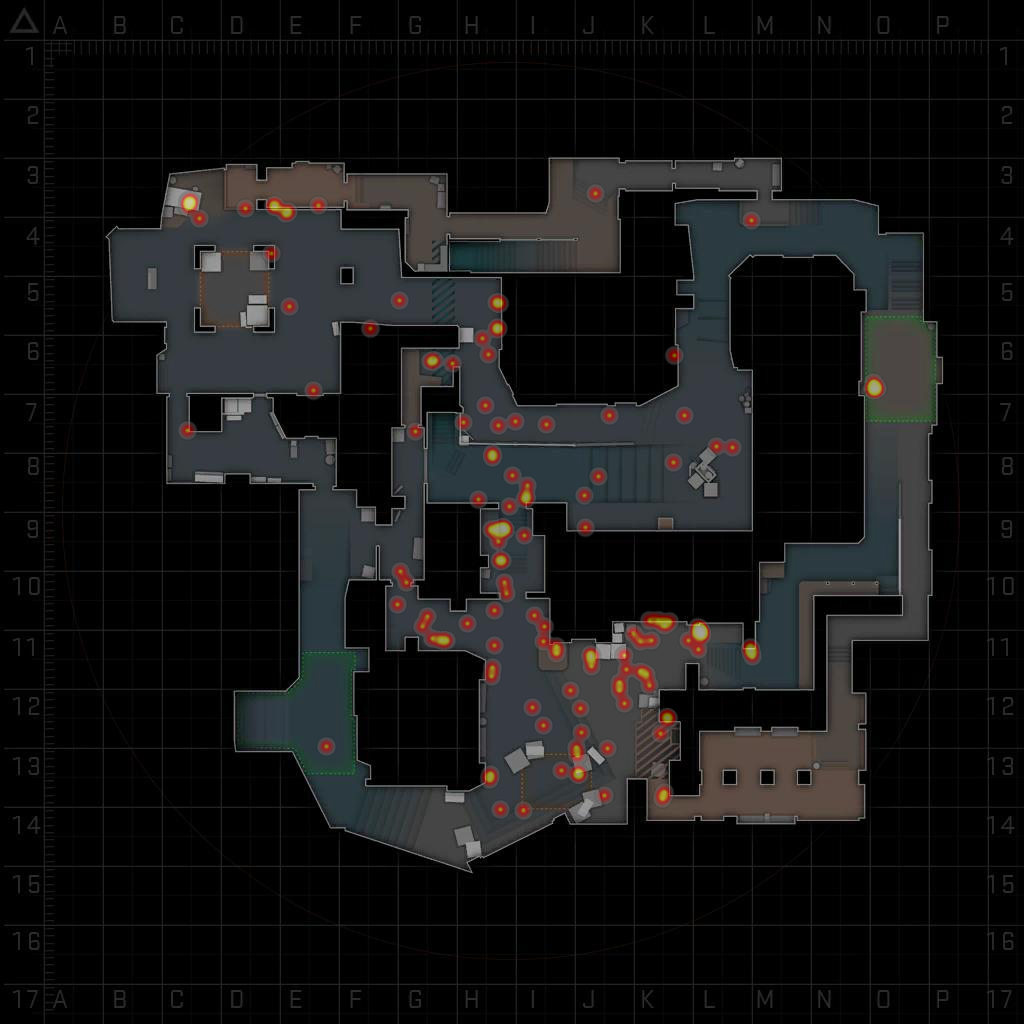

In [87]:
if(mirageImg == nil){
   os.Exit(1)
}
mirageImg